In [5]:
import time
import requests
from bs4 import BeautifulSoup
import csv

data = [
    ["name", "author", "link", "rating", "rating_count", "review_count", "pages_count", "price", "text_reviews", "age", "year"]
]

for p in range(1, 41):

    url = "https://www.litres.ru/genre/programmirovanie-5272/?page=" + str(p)
    time.sleep(1)
    response = requests.get(url)

    page = BeautifulSoup(response.text, 'lxml')

    find_links = page.find_all('div', class_='ArtInfo_wrapper__GoMsb')

    for find_link in find_links:
        book_link = find_link.find('a').get('href')
        book_link = "https://www.litres.ru" + book_link
        # print(book_link)
        url = book_link
        time.sleep(1)
        response = requests.get(url)
        page = BeautifulSoup(response.text, 'lxml')
        book_content = page.find('div', class_='BookCard_book__content__7J8Fc')
        try:
            name = book_content.find('h1').text
        except:
            name = ""
        # print(name)
        try:
            author = book_content.find('div', class_='Truncate_truncated__jKdVt').text
        except:
            author = ""
        # print(author)
        try:
            rating = book_content.find('meta', attrs={'itemprop': 'ratingValue'}).attrs['content']
        except:
            rating = ""
        # print(rating)
        try:
            rating_count = book_content.find('meta', attrs={'itemprop': 'ratingCount'}).attrs['content']
        except:
            rating_count = ""
        # print(rating_count)
        try:
            review_count = book_content.find('div', attrs={'data-testid': 'book-factoids__reviews'}).find('div', class_='BookFactoids_primary__TVFhL').find('span').text
        except:
            review_count = ""
        # print(review_count)
        try:
            pages_count = page.find('div', class_='BookCard_book__preview__data__XjF_j').find_all('p')[0].text.split()[1]
        except:
            pages_count = ""
        # print(pages_count)
        try:
            year = page.find('div', class_='BookCard_book__preview__data__XjF_j').find_all('p')[1].text.split()[0]
        except:
            year = ""
        # print(year)
        try:
            age = page.find('div', class_='BookCard_book__preview__data__XjF_j').find_all('p')[2].text
        except:
            age = ""
        # print(age)
        link = url
        try:
            price = page.find('meta', attrs={'itemprop': 'price'}).attrs['content']
        except:
            price = ""
        # print(price)

        book_link_reviews = book_link + "otzivi/"
        time.sleep(1)
        response = requests.get(book_link_reviews)
        page = BeautifulSoup(response.text, 'lxml')
        try:
            text_reviews = page.find_all('div', class_='Comment_reviewText__PEkHn')
        except:
            text_reviews = []
        for i in range(len(text_reviews)):
            if text_reviews[i].find('p'):
                text_reviews[i] = text_reviews[i].find('p').text
            elif text_reviews[i].find_next('div'):
                text_reviews[i] = text_reviews[i].find_next('div').text
            else:
                text_reviews[i] = ""
        # print(text_reviews)

        data.append([name, author, link, rating, rating_count, review_count, pages_count, price, text_reviews, age, year])
        # print(data[-1])

file_name = 'book_info.csv'

with open(file_name, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)



In [198]:
import pandas as pd

In [199]:
# 1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?

df = pd.read_csv('book_info.csv')

num_rows = df.shape[0]
num_columns = df.shape[1]

print(f"Число строк: {num_rows}")
print(f"Число столбцов: {num_columns}")

df.head()

Число строк: 960
Число столбцов: 11


,name,author,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year
0,Начинаем программировать на Python,Тони Гэддис,https://www.litres.ru/book/toni-geddis-3249116...,5.0,16,6,875,599.0,['Шикарная книга! Начал изучать Python самосто...,12+,2021
1,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0.0,0,1,319,549.0,"['Эта книга из той лиги, в которой я пока не с...",0+,2022
2,System Design. Подготовка к сложному интервью,Алекс Сюй,https://www.litres.ru/book/aleks-suy/system-de...,3.6,17,9,304,699.0,['Добротная книга по разработке архитектуры пр...,16+,2020
3,Высоконагруженные приложения. Программирование...,Мартин Клеппман,https://www.litres.ru/book/martin-kleppman-173...,4.0,51,11,640,799.0,"['Не могу что-либо про перевод сказать, читал ...",16+,2017
4,Python Библиотеки,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/pytho...,5.0,339,11,192,690.0,['На каждую библиотеку в книге приводится прим...,12+,2024


In [200]:
# 2. Есть ли в датасете пропуски? (0.5)

missing_values = df.isnull().sum()
print(missing_values)

name             0
author           0
link             0
rating           0
rating_count     0
review_count     0
pages_count      1
price           24
text_reviews     0
age             49
year             1
dtype: int64


In [201]:
# 3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).

mean_pages_count = round(df[pd.to_numeric(df['pages_count'], errors='coerce').notna()]['pages_count'].astype(int).mean())
mean_year = round(df[pd.to_numeric(df['year'], errors='coerce').notna()]['year'].astype(int).mean())

df["pages_count"] = pd.to_numeric(df["pages_count"], errors='coerce').fillna(mean_pages_count).astype(int)
df["year"] = pd.to_numeric(df["year"], errors='coerce').fillna(mean_year).astype(int)

print(df.dtypes)

name             object
author           object
link             object
rating          float64
rating_count      int64
review_count      int64
pages_count       int64
price           float64
text_reviews     object
age              object
year              int64
dtype: object


In [202]:
# Какая медианная цена книги в вашем датасете? (1)

print(df["price"].median())

349.0


In [203]:
# Какое возрастное ограничение встречается чаще всего? (1)

print(df["age"].value_counts().idxmax())

0+


In [204]:
# Какое среднее число отзывов в книге? (1)

print(round(df["review_count"].mean()))

2


In [205]:
# Сколько книг имеют оценку ниже 4.25? (1)

print(df[df["rating"] < 4.25].shape[0])

547


In [206]:
# В каком году было написано больше всего книг из датасета? (1)

print(df["year"].value_counts().idxmax())

2023


In [207]:
# 6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

def new_field(row):
    if row["rating"] >= 4.6 and row["review_count"] >= 5:
        return 1
    else:
        return 0

df["is_popular"] = df.apply(new_field, axis=1)

df.head()

,name,author,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year,is_popular
0,Начинаем программировать на Python,Тони Гэддис,https://www.litres.ru/book/toni-geddis-3249116...,5.0,16,6,875,599.0,['Шикарная книга! Начал изучать Python самосто...,12+,2021,1
1,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0.0,0,1,319,549.0,"['Эта книга из той лиги, в которой я пока не с...",0+,2022,0
2,System Design. Подготовка к сложному интервью,Алекс Сюй,https://www.litres.ru/book/aleks-suy/system-de...,3.6,17,9,304,699.0,['Добротная книга по разработке архитектуры пр...,16+,2020,0
3,Высоконагруженные приложения. Программирование...,Мартин Клеппман,https://www.litres.ru/book/martin-kleppman-173...,4.0,51,11,640,799.0,"['Не могу что-либо про перевод сказать, читал ...",16+,2017,0
4,Python Библиотеки,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/pytho...,5.0,339,11,192,690.0,['На каждую библиотеку в книге приводится прим...,12+,2024,1


In [208]:
# 7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

df_is_popular = df[df["is_popular"] == 1]
mean_pages_count_popular  = round(df_is_popular['pages_count'].mean())

df_is_unpopular = df[df["is_popular"] == 0]
mean_pages_count_unpopular = round(df_is_unpopular['pages_count'].mean())

print(f"Среднее число страниц среди популярных книг: {mean_pages_count_popular}")
print(f"Среднее число страниц среди непопулярных книг: {mean_pages_count_unpopular}")
print(f"Разница: {mean_pages_count_popular - mean_pages_count_unpopular} страниц")

Среднее число страниц среди популярных книг: 348
Среднее число страниц среди непопулярных книг: 256
Разница: 92 страниц


In [209]:
# 8. Выведите топ-10 книг по числу отзывов. (2).

df.nlargest(10, "review_count")

,name,author,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year,is_popular
489,Оптимизация в Python,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/optim...,5.0,305,41,252,690.0,['Много интересных путей оптимизации показано....,12+,2023,1
5,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,102,690.0,['Книга отличная. Давно хотела понять как все ...,12+,2023,1
125,Психбольница в руках пациентов. Алан Купер об ...,Алан Купер,https://www.litres.ru/book/alan-kuper/psihboln...,4.0,64,30,502,599.0,"['хорошая книжка, но уже немного подотстает от...",16+,2004,0
122,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,224,599.0,['Прекрасная книга. Рекомендовал и старшим шко...,16+,2017,0
351,Идеальный программист. Как стать профессионало...,Роберт Мартин,https://www.litres.ru/book/robert-s-martin/ide...,4.6,191,27,247,449.0,['Книга – истинный кладезь премудрости для опт...,12+,2011,1
516,"Говорят, в IT много платят. Как построить успе...",Елена Правдина,https://www.litres.ru/book/elena-pravdina-2543...,4.3,66,27,291,379.0,['Книга написана профессиональным специалистом...,16+,2021,0
150,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,210,299.0,"['Отличная книга чтобы начать программировать,...",12+,2017,0
453,Базовые знания тестировщика веб-приложений,"Марина Охапкина,",https://www.litres.ru/book/vadim-ohapkin/bazov...,4.5,237,25,67,NaN,"['Из любопытства просмотрела книгу и, как опыт...",12+,2015,0
26,Сделай видеоигру один и не свихнись,Слава Грис,https://www.litres.ru/book/slava-gris/sdelay-v...,4.8,85,24,242,499.0,['Отличная книга для инди-разработчиков! Must ...,12+,2023,1
229,Сделай видеоигру один и не свихнись,Слава Грис,https://www.litres.ru/audiobook/slava-gris/sde...,4.9,73,24,260,529.0,"['Начну со слов ""Слава - моё почтение"".', 'Дей...",12+,2023,1


In [210]:
# 9. Найдите среднюю длину отзыва (в символах). (2)



In [211]:
# 10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

correlation_table = df[['rating', 'rating_count', 'review_count', 'price']].corr()
correlation_table

# наблюдается корреляция между числом отзывов и числом оценок

,rating,rating_count,review_count,price
rating,1.000000,0.246761,0.330897,0.313769
rating_count,0.246761,1.000000,0.688101,0.173922
review_count,0.330897,0.688101,1.000000,0.214635
price,0.313769,0.173922,0.214635,1.000000


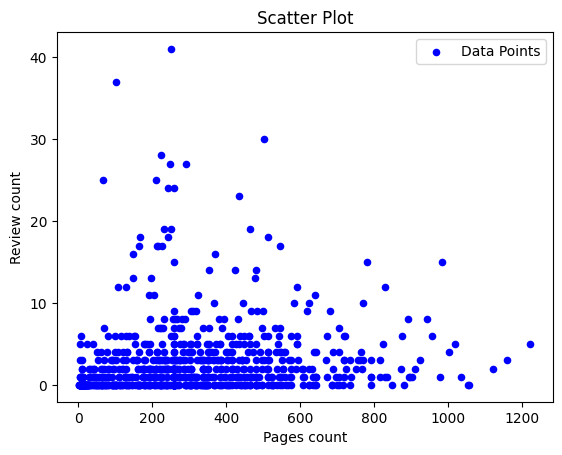

In [212]:
# 11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

import matplotlib.pyplot as plt

df.plot(kind='scatter', x='pages_count', y='review_count', color='b', label='Data Points')

plt.title('Scatter Plot')
plt.xlabel('Pages count')
plt.ylabel('Review count')

plt.show()

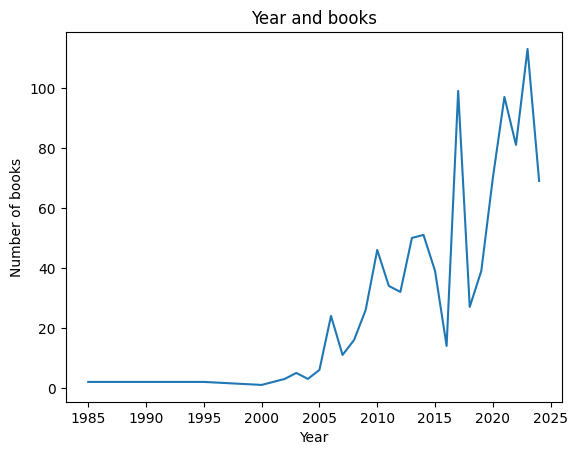

In [213]:
# 12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

value_counts = df['year'].value_counts().sort_index()

value_counts.plot(kind='line')

plt.title('Year and books')
plt.xlabel('Year')
plt.ylabel('Number of books')

plt.show()

In [214]:
# 13. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

In [215]:
# 14. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

df.groupby('author').agg({'name': 'count', 'rating': 'mean', 'review_count': 'mean'})

,name,rating,review_count
author,,,
Arsen Gonian,1,5.000000,1.000000
C. И. Никишов,1,4.700000,3.000000
ChatGPT-4,2,3.950000,9.000000
Eugeny Shtoltc,2,2.500000,0.000000
Jade Carter,1,0.000000,0.000000
...,...,...,...
м. г. радченко,3,2.833333,10.333333
"м. г. радченко,",1,5.000000,3.000000
питер гудлиф,1,4.000000,0.000000
